In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [42]:
'''
Representation of a Tic Tac Toe board

Every state is represented as a number : if (0: refers an empty space , 1: Us, 2: Opponent)
[0 1 2]     [- X 0]
[0 1 2] --> [- X O] 
[0 1 0]     [- X -]

represented as (0*(3^0) + 1*(3^1) + 2*(3^2) + 0*(3^3) + 1*(3^4) + 2*(3^5) + 0*(3^6) + 1*(3^7) + 0*(3^8) )
'''

############################################################################
#####   Q 4.1 : Initialising the game...
#############################################################################
class TicTacToe(object):
    def __init__(self):
        self.state = 0  ### base state with all empty
        self.b2sym = {'0': "-", '1':"X", '2': "O"}
        self.free_actions = {0,1,2,3,4,5,6,7,8}
        
        self.reward = 0
        self.done = 0
        
        self.win_count = [0,0,0]## Draws , X wins , O wins 
        
    def reset(self):
        self.state = 0  ### base state with all empty
        self.b2sym = {'0': "-", '1':"X", '2': "O"}
        self.free_actions = {0,1,2,3,4,5,6,7,8}
        
        self.reward = 0
        self.done = 0
        self.first_move = random.choice([1,2])
        
        
    def check_valid(self,action):
        if(action in self.free_actions):
            return True
        return False
    ################# Utilities for check status #############
    
    def check_row(self, row_no):
        '''
        check if row is filled
        '''
        if(self.state_b3[(3*row_no) + 0] != '0' 
           and (self.state_b3[(3*row_no) + 0] == self.state_b3[(3*row_no) + 1])
           and (self.state_b3[(3*row_no) + 1] == self.state_b3[(3*row_no) + 2]) ) :
            
            return int(self.state_b3[(3*row_no) + 0])
        return 0
    
    def check_col(self, col_no):
        '''
        check if col is filled
        '''
        if(self.state_b3[col_no + (3*0)] != '0' 
           and (self.state_b3[col_no + (3*0)] == self.state_b3[col_no + (3*1)])
           and (self.state_b3[col_no + (3*1)] == self.state_b3[col_no + (3*2)]) ) :

            return int(self.state_b3[col_no + (3*0)])
        return 0
    
    def check_diag(self):
        '''
        check if diag is filled
        '''
        if(self.state_b3[0]!='0'
          and (self.state_b3[0]==self.state_b3[4])
          and (self.state_b3[4]==self.state_b3[8])):
            return int(self.state_b3[0])
        return 0
    
    def check_antidiag(self):
        '''
        check if anti diag is filled
        '''
        if(self.state_b3[2]!='0'
          and (self.state_b3[2]==self.state_b3[4])
          and (self.state_b3[4]==self.state_b3[6])):

            return int(self.state_b3[2])
        return 0
    #############################################################    


    def check_status(self):
        '''
        return 0 if game is live
        1 if 1 wins
        2 if 2 wins
        -1 if drawn
        '''
        if(len(self.free_actions) >=5): #game is live if only 4 or less actions were taken
            return 0 
        else:
            for i in range(3): #### Checking all rows
                if(self.check_row(i)!=0):
                    return self.check_row(i)

                
            for j in range(3): #### Checking for cols
                if(self.check_col(j)!=0):
                    return self.check_col(j)

            
            if(self.check_diag()!=0): #### Checking for diag
                return self.check_diag()

            
            if(self.check_antidiag()!=0): ### Checking for antidiag
                return self.check_antidiag()
            
           
        if(len(self.free_actions) == 0): 
            return -1 ### game drawn
        return 0 ### The game is still live if none satisfy
   
    ###################### Utility for act
    def base3_rep(self,x):
        '''
        returns base rep in reverse formate
        567 := 000210000 --> 000012000
        '''
        bit_rep = np.base_repr(x, 3)
        ans = "0"*(9-len(bit_rep)) + bit_rep
        ans = ans[::-1]## reversed.
        return ans
    #######################################################


    def act(self,agent_b,action, display_every = False, display_final = False):
        '''
        Will make a move given an action , 
        --> changes state
        --> checks if game has ended..
        '''
        self.free_actions.remove(action)
        #self.reward = 0
        if(self.done ==1):
            #print("GAME OVER !!")
            return [self.state, self.reward, self.done]
        
        ### checking will be done by checking in self.free actions
        self.state  = self.state + agent_b*(pow(3, action))
        self.state_b3 = self.base3_rep(self.state)
        self.game_status = self.check_status()
        
        if(display_every):
            self.print_board()
            print("Status : ",self.game_status)
            
        if(self.game_status != 0):
            if(self.game_status ==1):
                #print("Agent Wins !!!")
                self.win_count[1] = self.win_count[1] + 1 
                self.reward = +10
                
            elif(self.game_status==2):
                #print("Opponent Wins :( ")
                self.win_count[2] = self.win_count[2] + 1
                self.reward = -10
            elif(self.game_status == -1):
                #print("Game Drawn")
                self.reward = 1
                self.win_count[0] = self.win_count[0] + 1
            self.done = 1
            
            if(display_final):
                self.print_board()
                print("Status : ",self.game_status)
        
            
        return [self.state, self.reward, self.done, self.win_count]
            
    ### print board method...    
    def print_board(self): ### printing the board
        '''
        Takes the number representation of the state --> converts to bit representation of base 3--> prints it
        '''
        state_b3 = self.base3_rep(self.state)
        for i in range(9):
            if(i%3==0) :
                print("");
            print(self.b2sym[self.state_b3[i]], end = " ")
        print("")
        
    def print_board_given_state(self, state = None): ### printing the board
        '''
        Takes the number representation of the state --> converts to bit representation of base 3--> prints it
        '''
        
        if(state !=None):
            state_b3 = self.base3_rep(state)
        for i in range(9):
            if(i%3==0) :
                print("");
            print(self.b2sym[state_b3[i]], end = " ")
        print("")
        

In [43]:
##### defining Agents and their policies 


#############################33  Parent classes for agents ####################3
class Player :
    def __init__(self, player_id, player_name = None):
        self.player_id = player_id ### either 1 : X or 2: O
        self.player_name =  player_name
        

class ComputerPlayer(Player):
    
    def __init__(self,player_id, player_name):
        Player.__init__(self,player_id, player_name)
    def get_player_id(self):
        return self.player_id
    
    def get_player_name(self):
        return self.player_name
#######################################################################################3
class random_agent(ComputerPlayer,TicTacToe):

    def __init__ (self, player_id, player_name):
        ComputerPlayer.__init__(self,player_id, player_name)
    
    def policy(self, TTT_obj):
        action = random.sample(TTT_obj.free_actions,1)[0]
        return action
    
class safe_agent(ComputerPlayer, TicTacToe):
    def __init__ (self, player_id, player_name):
        ComputerPlayer.__init__(self,player_id, player_name)
        
    ########## Utilities for ..policy

    def helper(self,a, player_id):

        if(player_id == 2):
            if(a==2) :return 1
            elif(a==1): return -1
            else: return 0
            
        elif(player_id == 1):
            if(a==2): return -1
            elif(a==1): return +1
            else: return 0
    
    def state2arr(self,TTT_obj, player_id):### to convert state in int form to array with -1(X), 0(.), 1(O)
        base_rep = self.base3_rep(TTT_obj.state)
        arr = np.array([[ self.helper(int(base_rep[3*i + j]), player_id) for j in range(3)]for i in range(3)])
        
        return arr
    

    def return_set_of_sums(self,p, state_arr): ## pos poistion of free moves {0,3, 7}
        ### returns the set of sums of row_sum, col_sum, diag_sum, anti_diag_sum
        ###if not possible to compute diag or anti diag returns -1

        i,j = int(p/3), int(p%3)
        row_sum = np.sum(state_arr[i,:])
        col_sum  = np.sum(state_arr[:,j])
        diag_sum = -1
        anti_diag_sum = -1


        if(p in {0,4,8}): ## possible to calculate diag sum
            diag_sum = state_arr[0][0] + state_arr[1][1] + state_arr[2][2]


        if(p in {2,4,6}):##3 possible to calculate antidiag sum
            anti_diag_sum =  state_arr[2][0] + state_arr[1][1] + state_arr[0][2]
        return {row_sum, col_sum, diag_sum , anti_diag_sum}

        
    def policy(self, TTT_obj):
        win_action_set = set()
        block_action_set = set()
        win_flag = False
        block_flag = False
        
        
        ##### Remember the safe agent can only place an 'O' i.e a number 1 and 'X' represent -1 in state_arr
        ### If sum of row /col/diag/antidiag ==+2 : win case
        ### if ==-2 block case
        state_arr = self.state2arr(TTT_obj, player_id =self.player_id ) ## create arr wrt player  
        #print(state_arr)
        for p in TTT_obj.free_actions:
            action_set_of_sums = self.return_set_of_sums(p, state_arr)### possible sums other than p (row, col, diag,antidiag)
            if(2 in action_set_of_sums):
                win_action_set.add(p) ## win condition
                win_flag = True
            elif(-2 in action_set_of_sums):
                block_action_set.add(p)
                block_flag = True
            
        if(win_flag):
            action = random.sample(win_action_set,1)[0]  ### win condition
            #print("I chose win")
        elif(block_flag):
            action = random.sample(block_action_set,1)[0] ### block condition
            #print("I chose block")
        else:
            action =random.sample(TTT_obj.free_actions,1)[0] ### random condition
            #print("I chose rand")
        return action
##############################################3  Q Agent ############################
class Q_agent(ComputerPlayer, TicTacToe):
    def __init__(self, player_id, player_name):
        ComputerPlayer.__init__(self,player_id, player_name)
        self.eps = 0.05  ### eps for eps-greedy
        self.gamma = 0.9  ### discount factor
        self.alpha = 0.01 ### learning rate
        self.Q_val = {} ### The Q(s,a)
        
    def eps_greedy(self, TTT_obj):
        '''
        randomly chooses random or greedy policy
        '''
        r = random.random()
        if( r < self.eps):
            return random.sample(TTT_obj.free_actions,1)[0]
        elif(r>= self.eps):
            return self.policy(TTT_obj)### full greedy

    def policy(self, TTT_obj):
        '''
        Used while testing
        '''
        s = TTT_obj.state
        max_Qsa = max([self.find_Q(s,a) for a in TTT_obj.free_actions])
        max_actions = [a for a in TTT_obj.free_actions if self.Q_val[(s,a)] == max_Qsa]
        return random.sample(max_actions,1)[0]
    
    def find_Q(self,s,a):
        if(s,a) not in self.Q_val:
            self.Q_val[(s,a)] = 0
        return self.Q_val[(s,a)]
    
    
    def Q_update(self, curr_s, curr_a, r, nxt_s, nxt_actions):
        '''
        Q_update based on Q-learning
        '''
        if(len(nxt_actions) == 0):
            max_val = 0
        else: 
            max_val = max([self.find_Q(nxt_s,a) for a in nxt_actions])
        #print('Before update Q(%d, %d) = %.3f'%(curr_s, curr_a, self.find_Q(curr_s, curr_a) ) )
        self.Q_val[(curr_s, curr_a)] = ( (1-self.alpha)*( self.Q_val[(curr_s, curr_a) ] ) )+ (self.alpha*(r + (self.gamma*max_val) ))
        #print('After update Q(%d, %d) = %.3f'%(curr_s, curr_a,self.find_Q(curr_s, curr_a) ) )
 


### 5.c

In [44]:
########################## Training and testing 


def train(TTT_obj, agent, opponents, epochs, test_every, test_epochs):
    epoch_list, draws_list, wins_list, loss_list = [],[],[],[]
    for e in range(epochs):
        opponent =random.sample(opponents,1)[0]
        players = [agent, opponent]
        
        TTT_obj.reset()
        player = players[TTT_obj.first_move-1] 
        
        if(player == opponent):
            _a = opponent.policy(TTT_obj)
            TTT_obj.act(player.get_player_id(),_a,display_every = False)
            
        while(TTT_obj.done == 0):
            curr_s = TTT_obj.state
            curr_a =  agent.eps_greedy(TTT_obj)
            [nxt_s,r,_,_] = TTT_obj.act(agent.get_player_id(),curr_a,display_every = False)
        
            if(TTT_obj.done):
                pass
            else:
                opp_a = opponent.policy(TTT_obj)
                [nxt_s,r,_,_] = TTT_obj.act(opponent.get_player_id(), opp_a, display_every = False)
                
                
            agent.Q_update(curr_s, curr_a, r, nxt_s, TTT_obj.free_actions)
        if(e % test_every == 0):
            print("At Epoch ", e, end = " ")
            d,w,l = test(TTT_obj, agent, opponents, test_epochs)
            epoch_list.append(e)
            draws_list.append(d)
            wins_list.append(w)
            loss_list.append(l)
    return epoch_list, draws_list, wins_list, loss_list
            
        
def test(TTT_obj, agent,opponents, test_epochs):
    
    TTT_obj.win_count = [0,0,0]
    for e in range(test_epochs): 
        opponent =random.sample(opponents,1)[0]
        players = [agent, opponent]

        TTT_obj.reset()
        player = players[TTT_obj.first_move-1] 
        

        while(TTT_obj.done == 0):
            curr_s = TTT_obj.state
            curr_a =  player.policy(TTT_obj)  #### Full greeddy
            after_action_state =  TTT_obj.act(player.get_player_id(),curr_a,display_every = False)

            if(player.get_player_id() == 1):
                player = opponent
            elif(player.get_player_id() == 2):
                player = agent
                
    print('For %d test episodes ==>  Draws :%d  Wins: %d Losses :%d '%(test_epochs, after_action_state[3][0],after_action_state[3][1],after_action_state[3][2] ) )
    draws, wins, losses = after_action_state[3][0],after_action_state[3][1],after_action_state[3][2]
    return draws, wins, losses

### Training and testing with random bot

At Epoch  0 For 100 test episodes ==>  Draws :14  Wins: 45 Losses :41 
At Epoch  200 For 100 test episodes ==>  Draws :13  Wins: 55 Losses :32 
At Epoch  400 For 100 test episodes ==>  Draws :11  Wins: 51 Losses :38 
At Epoch  600 For 100 test episodes ==>  Draws :11  Wins: 46 Losses :43 
At Epoch  800 For 100 test episodes ==>  Draws :20  Wins: 47 Losses :33 
At Epoch  1000 For 100 test episodes ==>  Draws :7  Wins: 62 Losses :31 
At Epoch  1200 For 100 test episodes ==>  Draws :10  Wins: 67 Losses :23 
At Epoch  1400 For 100 test episodes ==>  Draws :19  Wins: 66 Losses :15 
At Epoch  1600 For 100 test episodes ==>  Draws :15  Wins: 60 Losses :25 
At Epoch  1800 For 100 test episodes ==>  Draws :15  Wins: 71 Losses :14 
At Epoch  2000 For 100 test episodes ==>  Draws :11  Wins: 65 Losses :24 
At Epoch  2200 For 100 test episodes ==>  Draws :20  Wins: 69 Losses :11 
At Epoch  2400 For 100 test episodes ==>  Draws :11  Wins: 73 Losses :16 
At Epoch  2600 For 100 test episodes ==>  Draw

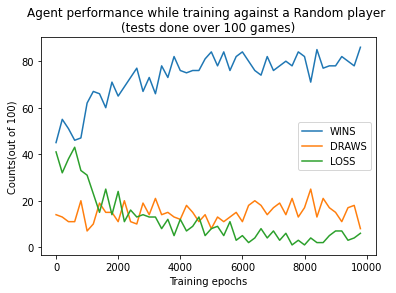

In [31]:


random.seed(0)
TTT = TicTacToe()
agent_r = Q_agent(1, 'Q')
random_bot= random_agent(2, "RB")

epoch_list, draws_list, wins_list, loss_list = train(TTT, agent_r, opponents = [random_bot], epochs = 10000, test_every = 200, test_epochs= 100 )

plt.plot(epoch_list,wins_list, label = 'WINS')
plt.plot(epoch_list,draws_list, label = 'DRAWS')
plt.plot(epoch_list,loss_list, label = 'LOSS')
plt.xlabel('Training epochs')
plt.ylabel('Counts(out of 100)')
plt.title('Agent performance while training against a Random player \n(tests done over 100 games)')
plt.legend()
plt.show()

### Training and testing with safe bot

At Epoch  0 For 100 test episodes ==>  Draws :21  Wins: 5 Losses :74 
At Epoch  200 For 100 test episodes ==>  Draws :25  Wins: 5 Losses :70 
At Epoch  400 For 100 test episodes ==>  Draws :20  Wins: 7 Losses :73 
At Epoch  600 For 100 test episodes ==>  Draws :17  Wins: 9 Losses :74 
At Epoch  800 For 100 test episodes ==>  Draws :29  Wins: 13 Losses :58 
At Epoch  1000 For 100 test episodes ==>  Draws :33  Wins: 21 Losses :46 
At Epoch  1200 For 100 test episodes ==>  Draws :37  Wins: 18 Losses :45 
At Epoch  1400 For 100 test episodes ==>  Draws :43  Wins: 16 Losses :41 
At Epoch  1600 For 100 test episodes ==>  Draws :55  Wins: 10 Losses :35 
At Epoch  1800 For 100 test episodes ==>  Draws :58  Wins: 14 Losses :28 
At Epoch  2000 For 100 test episodes ==>  Draws :62  Wins: 20 Losses :18 
At Epoch  2200 For 100 test episodes ==>  Draws :67  Wins: 16 Losses :17 
At Epoch  2400 For 100 test episodes ==>  Draws :64  Wins: 19 Losses :17 
At Epoch  2600 For 100 test episodes ==>  Draws :

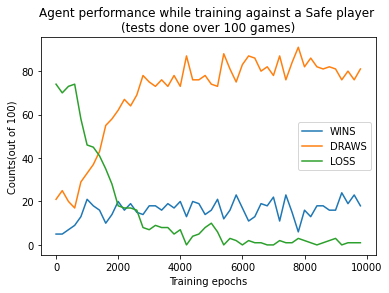

In [32]:
#

random.seed(0)
TTT = TicTacToe()
agent_s = Q_agent(1, 'Q')
safe_bot= safe_agent(2, "RS")

epoch_list, draws_list, wins_list, loss_list = train(TTT, agent_s, opponents = [safe_bot], epochs = 10000, test_every = 200, test_epochs= 100 )

plt.plot(epoch_list,wins_list, label = 'WINS')
plt.plot(epoch_list,draws_list, label = 'DRAWS')
plt.plot(epoch_list,loss_list, label = 'LOSS')
plt.xlabel('Training epochs')
plt.ylabel('Counts(out of 100)')
plt.title('Agent performance while training against a Safe player \n(tests done over 100 games)')
plt.legend()
plt.show()

### Training with both random and safe bot

At Epoch  0 For 100 test episodes ==>  Draws :12  Wins: 24 Losses :64 
At Epoch  200 For 100 test episodes ==>  Draws :16  Wins: 27 Losses :57 
At Epoch  400 For 100 test episodes ==>  Draws :15  Wins: 26 Losses :59 
At Epoch  600 For 100 test episodes ==>  Draws :18  Wins: 23 Losses :59 
At Epoch  800 For 100 test episodes ==>  Draws :12  Wins: 34 Losses :54 
At Epoch  1000 For 100 test episodes ==>  Draws :28  Wins: 31 Losses :41 
At Epoch  1200 For 100 test episodes ==>  Draws :34  Wins: 30 Losses :36 
At Epoch  1400 For 100 test episodes ==>  Draws :36  Wins: 31 Losses :33 
At Epoch  1600 For 100 test episodes ==>  Draws :34  Wins: 25 Losses :41 
At Epoch  1800 For 100 test episodes ==>  Draws :36  Wins: 28 Losses :36 
At Epoch  2000 For 100 test episodes ==>  Draws :44  Wins: 30 Losses :26 
At Epoch  2200 For 100 test episodes ==>  Draws :41  Wins: 36 Losses :23 
At Epoch  2400 For 100 test episodes ==>  Draws :42  Wins: 37 Losses :21 
At Epoch  2600 For 100 test episodes ==>  Dra

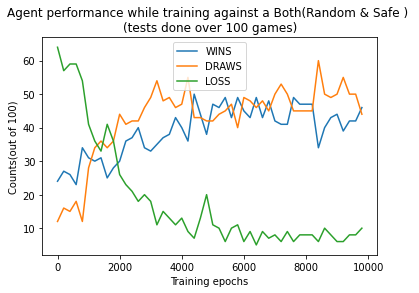

In [33]:
#### Training and testing with random bot and safe bot

random.seed(0)
TTT = TicTacToe()
agent_rs = Q_agent(1, 'Q')
safe_bot= safe_agent(2, "RS")
random_bot = random_agent(2, "RB")

epoch_list, draws_list, wins_list, loss_list = train(TTT, agent_rs, opponents = [safe_bot, random_bot], epochs = 10000, test_every = 200, test_epochs= 100 )

plt.plot(epoch_list,wins_list, label = 'WINS')
plt.plot(epoch_list,draws_list, label = 'DRAWS')
plt.plot(epoch_list,loss_list, label = 'LOSS')
plt.xlabel('Training epochs')
plt.ylabel('Counts(out of 100)')
plt.title('Agent performance while training against a Both(Random & Safe ) \n(tests done over 100 games)')
plt.legend()
plt.show()

###  Testing after training ( for 1000 episodes)

In [41]:
safe_bot= safe_agent(2, "RS")
random_bot = random_agent(2, "RB")


print('\nAgent trained on random - agent tested on random agent')
TTT =TicTacToe()
test(TTT,agent_r,opponents = [random_bot], test_epochs = 1000)


print('\nAgent trained on random - agent tested on safe agent')
TTT =TicTacToe()
test(TTT,agent_r,opponents = [safe_bot], test_epochs = 1000)


print('\nAgent trained on safe - agent tested on random agent')
TTT =TicTacToe()
test(TTT,agent_s,opponents = [random_bot], test_epochs = 1000)

print('\nAgent trained on safe - agent tested on safe agent')
TTT =TicTacToe()
test(TTT,agent_s,opponents = [safe_bot], test_epochs = 1000)

print('\nAgent trained on both - agent tested on random agent')
TTT =TicTacToe()
test(TTT,agent_rs,opponents = [random_bot], test_epochs = 1000)
print('\nAgent trained on both - agent tested on safe agent')
TTT =TicTacToe()
test(TTT,agent_rs,opponents = [safe_bot], test_epochs = 1000)




Agent trained on random - agent tested on random agent
For 1000 test episodes ==>  Draws :144  Wins: 816 Losses :40 

Agent trained on random - agent tested on safe agent
For 1000 test episodes ==>  Draws :570  Wins: 234 Losses :196 

Agent trained on safe - agent tested on random agent
For 1000 test episodes ==>  Draws :239  Wins: 628 Losses :133 

Agent trained on safe - agent tested on safe agent
For 1000 test episodes ==>  Draws :781  Wins: 202 Losses :17 

Agent trained on both - agent tested on random agent
For 1000 test episodes ==>  Draws :189  Wins: 787 Losses :24 

Agent trained on both - agent tested on safe agent
For 1000 test episodes ==>  Draws :779  Wins: 110 Losses :111 


(779, 110, 111)

### Q4)

By considering the no. of losses as a metric for efficacy of an agent , we can say that the agent trained on both random and safe is the best. 

Reason : Since it has seen different scenarios (broader training space)==> better performance.

### Q5)